In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense, LSTM, Bidirectional
from keras import losses
from keras import backend as K

import numpy as np
import pandas as pd
import random
from src.utils import *

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

random.seed(7)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Open files
Data_X_train = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Data_Y_train = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')

In [3]:
Data_X_train = feature_engineering(Data_X_train, two_points = True)

In [4]:
X_train = Data_X_train.as_matrix()[:, 1:]
Y_train = Data_Y_train.as_matrix()[:, 1:]

In [5]:
del Data_X_train, Data_Y_train

# Finding a good number of epochs for training
Note: Run before the update of the features

In [6]:
X_train_lstm = X_train.reshape((len(X_train), 18, 15, -1), order = 'F')
X_train_lstm = X_train_lstm.mean(axis = 2)

Y_train_lstm = np_utils.to_categorical(Y_train, 2)

In [ ]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(150, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 50, batch_size = 64, verbose = False,
                              validation_split = 0.15)

Text(0.5,1,'Loss')

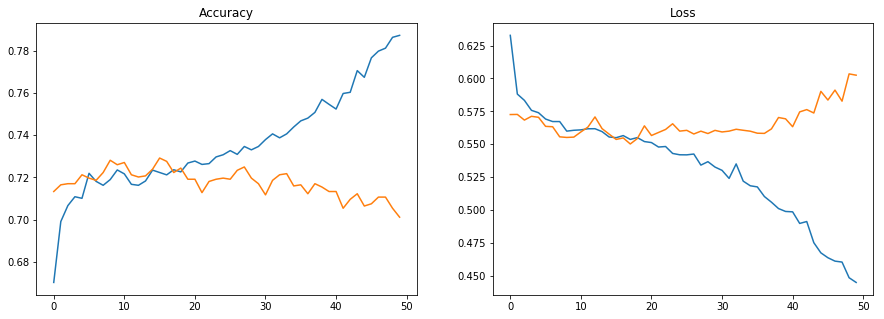

In [79]:
#Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.plot(range(50), training.history['acc'], range(50), training.history['val_acc'])
ax1.set_title('Accuracy')
ax2.plot(range(50), training.history['loss'], range(50), training.history['val_loss'])
ax2.set_title('Loss')

# Finding a suitable architecture
**Tuning hidden layer size**

In [84]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(75, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 949us/step - loss: 0.6527 - acc: 0.6557 - val_loss: 0.5835 - val_acc: 0.7054
Epoch 2/15
10689/10689 [==============================] - 6s 548us/step - loss: 0.6032 - acc: 0.6851 - val_loss: 0.5816 - val_acc: 0.7122
Epoch 3/15
10689/10689 [==============================] - 6s 546us/step - loss: 0.5901 - acc: 0.6994 - val_loss: 0.5907 - val_acc: 0.7165
Epoch 4/15
10689/10689 [==============================] - 6s 536us/step - loss: 0.5822 - acc: 0.7085 - val_loss: 0.5729 - val_acc: 0.7144
Epoch 5/15
10689/10689 [==============================] - 6s 546us/step - loss: 0.5781 - acc: 0.7131 - val_loss: 0.5706 - val_acc: 0.7160
Epoch 6/15
10689/10689 [==============================] - 6s 538us/step - loss: 0.5778 - acc: 0.7092 - val_loss: 0.5705 - val_acc: 0.7160
Epoch 7/15
10689/10689 [==============================] - 6s 538us/step - loss: 0.5712 - acc: 0.7119 - val_loss: 0.5660 - 

In [81]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(100, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 930us/step - loss: 0.6401 - acc: 0.6593 - val_loss: 0.5845 - val_acc: 0.7096
Epoch 2/15
10689/10689 [==============================] - 6s 538us/step - loss: 0.5996 - acc: 0.6931 - val_loss: 0.5890 - val_acc: 0.7122
Epoch 3/15
10689/10689 [==============================] - 6s 542us/step - loss: 0.5832 - acc: 0.7050 - val_loss: 0.5804 - val_acc: 0.7091
Epoch 4/15
10689/10689 [==============================] - 6s 521us/step - loss: 0.5800 - acc: 0.7088 - val_loss: 0.5789 - val_acc: 0.7122
Epoch 5/15
10689/10689 [==============================] - 6s 529us/step - loss: 0.5764 - acc: 0.7081 - val_loss: 0.5827 - val_acc: 0.7160
Epoch 6/15
10689/10689 [==============================] - 6s 516us/step - loss: 0.5716 - acc: 0.7160 - val_loss: 0.5709 - val_acc: 0.7117
Epoch 7/15
10689/10689 [==============================] - 6s 518us/step - loss: 0.5691 - acc: 0.7166 - val_loss: 0.5695 - 

In [82]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 902us/step - loss: 0.6512 - acc: 0.6561 - val_loss: 0.5861 - val_acc: 0.7138
Epoch 2/15
10689/10689 [==============================] - 5s 508us/step - loss: 0.5966 - acc: 0.6954 - val_loss: 0.5831 - val_acc: 0.7101
Epoch 3/15
10689/10689 [==============================] - 5s 508us/step - loss: 0.5875 - acc: 0.6978 - val_loss: 0.5754 - val_acc: 0.7122
Epoch 4/15
10689/10689 [==============================] - 5s 509us/step - loss: 0.5786 - acc: 0.7074 - val_loss: 0.5715 - val_acc: 0.7107
Epoch 5/15
10689/10689 [==============================] - 5s 506us/step - loss: 0.5731 - acc: 0.7134 - val_loss: 0.5751 - val_acc: 0.7160
Epoch 6/15
10689/10689 [==============================] - 5s 508us/step - loss: 0.5690 - acc: 0.7139 - val_loss: 0.5603 - val_acc: 0.7202
Epoch 7/15
10689/10689 [==============================] - 6s 526us/step - loss: 0.5674 - acc: 0.7141 - val_loss: 0.5633 - 

In [83]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(150, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 929us/step - loss: 0.6444 - acc: 0.6585 - val_loss: 0.5939 - val_acc: 0.7112
Epoch 2/15
10689/10689 [==============================] - 5s 510us/step - loss: 0.5959 - acc: 0.6971 - val_loss: 0.5765 - val_acc: 0.7128
Epoch 3/15
10689/10689 [==============================] - 5s 509us/step - loss: 0.5829 - acc: 0.7018 - val_loss: 0.5786 - val_acc: 0.7091
Epoch 4/15
10689/10689 [==============================] - 5s 510us/step - loss: 0.5802 - acc: 0.7062 - val_loss: 0.5692 - val_acc: 0.7122
Epoch 5/15
10689/10689 [==============================] - 5s 511us/step - loss: 0.5784 - acc: 0.7106 - val_loss: 0.5621 - val_acc: 0.7175
Epoch 6/15
10689/10689 [==============================] - 5s 511us/step - loss: 0.5730 - acc: 0.7119 - val_loss: 0.5757 - val_acc: 0.7213
Epoch 7/15
10689/10689 [==============================] - 5s 513us/step - loss: 0.5665 - acc: 0.7144 - val_loss: 0.5641 - 

**Tuning Dense Layer size**

In [85]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 50, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 979us/step - loss: 0.6483 - acc: 0.6536 - val_loss: 0.5944 - val_acc: 0.7048
Epoch 2/15
10689/10689 [==============================] - 6s 529us/step - loss: 0.6030 - acc: 0.6917 - val_loss: 0.5838 - val_acc: 0.7096
Epoch 3/15
10689/10689 [==============================] - 6s 532us/step - loss: 0.5905 - acc: 0.7026 - val_loss: 0.5759 - val_acc: 0.7112
Epoch 4/15
10689/10689 [==============================] - 6s 522us/step - loss: 0.5814 - acc: 0.7101 - val_loss: 0.5740 - val_acc: 0.7101
Epoch 5/15
10689/10689 [==============================] - 6s 532us/step - loss: 0.5772 - acc: 0.7126 - val_loss: 0.5735 - val_acc: 0.7197
Epoch 6/15
10689/10689 [==============================] - 6s 541us/step - loss: 0.5724 - acc: 0.7127 - val_loss: 0.5720 - val_acc: 0.7165
Epoch 7/15
10689/10689 [==============================] - 6s 561us/step - loss: 0.5759 - acc: 0.7121 - val_loss: 0.5630 - 

In [86]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 75, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 10s 974us/step - loss: 0.6499 - acc: 0.6605 - val_loss: 0.6033 - val_acc: 0.7059
Epoch 2/15
10689/10689 [==============================] - 5s 511us/step - loss: 0.5992 - acc: 0.6960 - val_loss: 0.5884 - val_acc: 0.7085
Epoch 3/15
10689/10689 [==============================] - 6s 515us/step - loss: 0.5838 - acc: 0.7037 - val_loss: 0.5820 - val_acc: 0.7175
Epoch 4/15
10689/10689 [==============================] - 6s 517us/step - loss: 0.5794 - acc: 0.7070 - val_loss: 0.5703 - val_acc: 0.7160
Epoch 5/15
10689/10689 [==============================] - 6s 534us/step - loss: 0.5734 - acc: 0.7182 - val_loss: 0.5700 - val_acc: 0.7144
Epoch 6/15
10689/10689 [==============================] - 5s 514us/step - loss: 0.5741 - acc: 0.7134 - val_loss: 0.5649 - val_acc: 0.7138
Epoch 7/15
10689/10689 [==============================] - 6s 523us/step - loss: 0.5692 - acc: 0.7144 - val_loss: 0.5657 - 

In [87]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 100, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 11s 988us/step - loss: 0.6461 - acc: 0.6625 - val_loss: 0.5896 - val_acc: 0.7122
Epoch 2/15
10689/10689 [==============================] - 5s 513us/step - loss: 0.5960 - acc: 0.6935 - val_loss: 0.5813 - val_acc: 0.7128
Epoch 3/15
10689/10689 [==============================] - 6s 545us/step - loss: 0.5786 - acc: 0.7095 - val_loss: 0.5738 - val_acc: 0.7138
Epoch 4/15
10689/10689 [==============================] - 6s 538us/step - loss: 0.5763 - acc: 0.7116 - val_loss: 0.5768 - val_acc: 0.7165
Epoch 5/15
10689/10689 [==============================] - 6s 525us/step - loss: 0.5741 - acc: 0.7118 - val_loss: 0.5682 - val_acc: 0.7170
Epoch 6/15
10689/10689 [==============================] - 6s 515us/step - loss: 0.5645 - acc: 0.7172 - val_loss: 0.5625 - val_acc: 0.7239
Epoch 7/15
10689/10689 [==============================] - 5s 510us/step - loss: 0.5662 - acc: 0.7163 - val_loss: 0.5602 - 

In [88]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 125, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 11s 1ms/step - loss: 0.6530 - acc: 0.6593 - val_loss: 0.5837 - val_acc: 0.7069
Epoch 2/15
10689/10689 [==============================] - 5s 513us/step - loss: 0.6007 - acc: 0.6932 - val_loss: 0.5797 - val_acc: 0.7144
Epoch 3/15
10689/10689 [==============================] - 5s 514us/step - loss: 0.5823 - acc: 0.7067 - val_loss: 0.5740 - val_acc: 0.7101
Epoch 4/15
10689/10689 [==============================] - 6s 517us/step - loss: 0.5746 - acc: 0.7130 - val_loss: 0.5824 - val_acc: 0.7160
Epoch 5/15
10689/10689 [==============================] - 6s 518us/step - loss: 0.5737 - acc: 0.7100 - val_loss: 0.5865 - val_acc: 0.7239
Epoch 6/15
10689/10689 [==============================] - 6s 520us/step - loss: 0.5684 - acc: 0.7181 - val_loss: 0.5723 - val_acc: 0.7239
Epoch 7/15
10689/10689 [==============================] - 6s 522us/step - loss: 0.5723 - acc: 0.7164 - val_loss: 0.5692 - va

In [89]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 150, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 11s 1ms/step - loss: 0.6500 - acc: 0.6611 - val_loss: 0.5791 - val_acc: 0.7064
Epoch 2/15
10689/10689 [==============================] - 5s 508us/step - loss: 0.5990 - acc: 0.6886 - val_loss: 0.5746 - val_acc: 0.7117
Epoch 3/15
10689/10689 [==============================] - 5s 510us/step - loss: 0.5825 - acc: 0.7071 - val_loss: 0.5757 - val_acc: 0.7107
Epoch 4/15
10689/10689 [==============================] - 6s 523us/step - loss: 0.5770 - acc: 0.7100 - val_loss: 0.5669 - val_acc: 0.7160
Epoch 5/15
10689/10689 [==============================] - 6s 519us/step - loss: 0.5734 - acc: 0.7163 - val_loss: 0.5816 - val_acc: 0.7170
Epoch 6/15
10689/10689 [==============================] - 6s 520us/step - loss: 0.5685 - acc: 0.7133 - val_loss: 0.5748 - val_acc: 0.7181
Epoch 7/15
10689/10689 [==============================] - 6s 521us/step - loss: 0.5691 - acc: 0.7153 - val_loss: 0.5631 - va

In [90]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(125, recurrent_dropout = 0.25), 
                                input_shape = (16, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 175, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
training = bi_lstm_model.fit(X_train_lstm, Y_train_lstm, 
                              epochs = 15, batch_size = 64, verbose = True,
                              validation_split = 0.15)

Train on 10689 samples, validate on 1887 samples
Epoch 1/15
10689/10689 [==============================] - 11s 1ms/step - loss: 0.6396 - acc: 0.6631 - val_loss: 0.5733 - val_acc: 0.7107
Epoch 2/15
10689/10689 [==============================] - 6s 527us/step - loss: 0.5946 - acc: 0.7011 - val_loss: 0.5795 - val_acc: 0.7122
Epoch 3/15
10689/10689 [==============================] - 6s 532us/step - loss: 0.5844 - acc: 0.7052 - val_loss: 0.5711 - val_acc: 0.7191
Epoch 4/15
10689/10689 [==============================] - 6s 537us/step - loss: 0.5728 - acc: 0.7134 - val_loss: 0.5681 - val_acc: 0.7170
Epoch 5/15
10689/10689 [==============================] - 6s 539us/step - loss: 0.5755 - acc: 0.7110 - val_loss: 0.5771 - val_acc: 0.7191
Epoch 6/15
10689/10689 [==============================] - 6s 532us/step - loss: 0.5695 - acc: 0.7135 - val_loss: 0.5761 - val_acc: 0.7239
Epoch 7/15
10689/10689 [==============================] - 6s 540us/step - loss: 0.5709 - acc: 0.7182 - val_loss: 0.5717 - va

# Last Layer projection

In [47]:
X_t, X_v, Y_t, Y_v = train_test_split(X_train_lstm, Y_train, test_size = 0.2)

In [48]:
#Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(175, recurrent_dropout = 0.25), 
                                input_shape = (18, 96)))
bi_lstm_model.add(Dropout(0.75))
bi_lstm_model.add(Dense(units = 150, 
                        activation = 'relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(units = 2, 
                        activation='softmax'))
bi_lstm_model.compile(loss = losses.categorical_crossentropy,
                      optimizer = 'adam',
                      metrics = ['accuracy'])

#Training
bi_lstm_model.fit(X_t, np_utils.to_categorical(Y_t, 2),
                  validation_data = (X_v, np_utils.to_categorical(Y_v, 2)),
                  epochs = 15, batch_size = 64, verbose = True)

Train on 10060 samples, validate on 2516 samples
Epoch 1/15
10060/10060 [==============================] - 8s 768us/step - loss: 0.6379 - acc: 0.6707 - val_loss: 0.5696 - val_acc: 0.7281
Epoch 2/15
10060/10060 [==============================] - 5s 539us/step - loss: 0.5985 - acc: 0.6930 - val_loss: 0.5650 - val_acc: 0.7325
Epoch 3/15
10060/10060 [==============================] - 5s 544us/step - loss: 0.5793 - acc: 0.7049 - val_loss: 0.5535 - val_acc: 0.7309
Epoch 4/15
10060/10060 [==============================] - 6s 551us/step - loss: 0.5796 - acc: 0.7098 - val_loss: 0.5581 - val_acc: 0.7305
Epoch 5/15
10060/10060 [==============================] - 6s 555us/step - loss: 0.5734 - acc: 0.7083 - val_loss: 0.5491 - val_acc: 0.7293
Epoch 6/15
10060/10060 [==============================] - 6s 558us/step - loss: 0.5700 - acc: 0.7125 - val_loss: 0.5496 - val_acc: 0.7401
Epoch 7/15
10060/10060 [==============================] - 6s 556us/step - loss: 0.5659 - acc: 0.7113 - val_loss: 0.5561 - v

Text(0.5,1,'Validation')

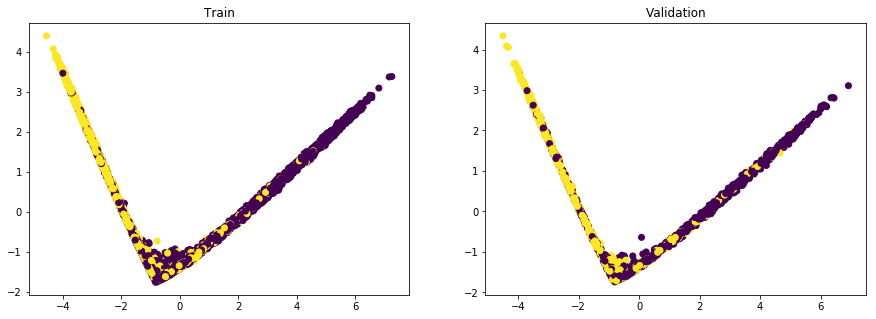

In [49]:
extract_cnn_features = K.function([bi_lstm_model.layers[0].input, K.learning_phase()],
                                  [bi_lstm_model.layers[3].output])
X_t_features = extract_cnn_features([X_t, 0])[0]
X_v_features = extract_cnn_features([X_v, 0])[0]

proj = PCA(n_components = 2)
X_proj = proj.fit_transform(X_t_features)


#Plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.scatter(X_proj[:, 0], X_proj[:, 1], c = Y_t.flatten())
ax1.set_title('Train')

X_proj = proj.transform(X_v_features)
ax2.scatter(X_proj[:, 0], X_proj[:, 1], c = Y_v.flatten())
ax2.set_title('Validation')

# Tune Random Forest parameters

In [29]:
def rdm_frst_tuning(parameters, X_t_features, Y_t, X_v_features, Y_v):
    clf = RandomForestClassifier(**parameters)
    clf.fit(X_t_features, Y_t.ravel())
    train_acc = clf.score(X_t_features, Y_t.ravel())
    val_acc = clf.score(X_v_features, Y_v.ravel())
    print('Train: {0:.2f} - Validation: {1:.2f}'.format(100*train_acc, 100*val_acc))

In [61]:
parameters = {'n_estimators': 300, 'max_depth': 60, 'min_samples_leaf': 2}

rdm_frst_tuning(parameters, X_t_features, Y_t, X_v_features, Y_v)

Train: 98.60 - Validation: 75.72


Text(0.5,1,'Validation - Prediction')

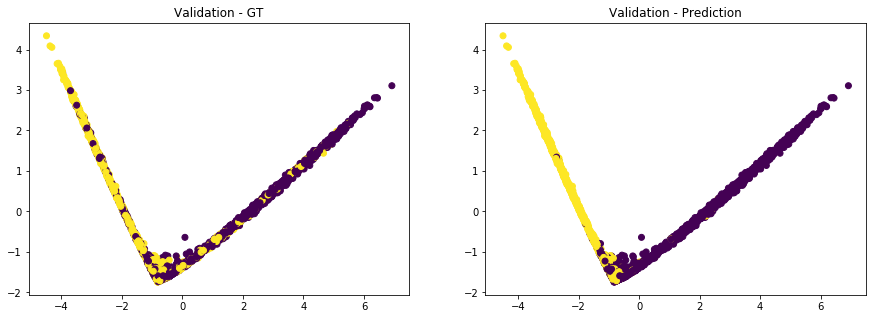

In [63]:
parameters = {'n_estimators': 300, 'max_depth': 60, 'min_samples_leaf': 2}
clf = RandomForestClassifier(**parameters)
clf.fit(X_t_features, Y_t.ravel())


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
ax1.scatter(X_proj[:, 0], X_proj[:, 1], c = Y_v.flatten())
ax1.set_title('Validation - GT')
ax2.scatter(X_proj[:, 0], X_proj[:, 1], c = clf.predict(X_v_features))
ax2.set_title('Validation - Prediction')